len_of_files: 1
reshape size 16
file_proccesing: 3010457_20111109_EDF_noisy_data


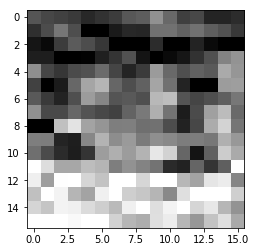

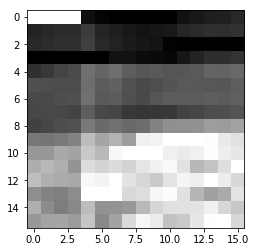

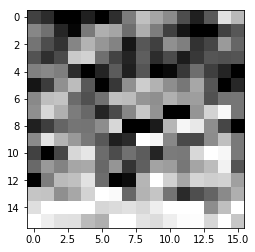

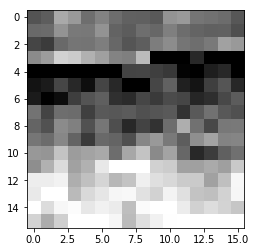

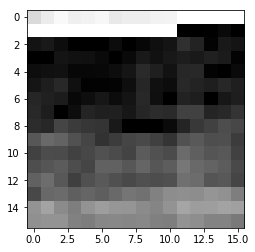

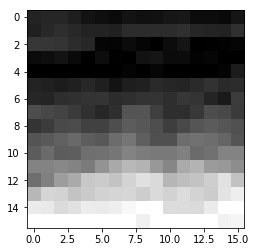

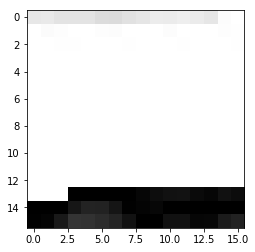

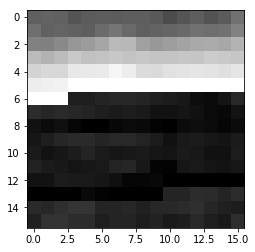

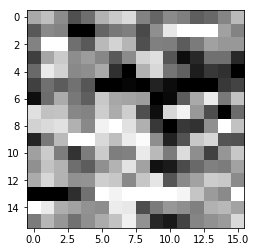

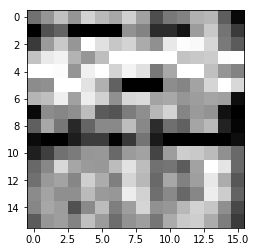

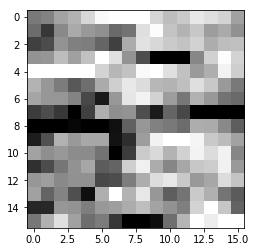

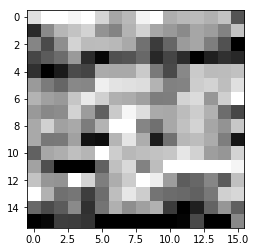

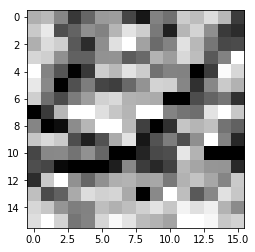

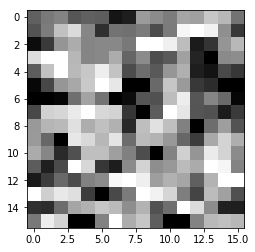

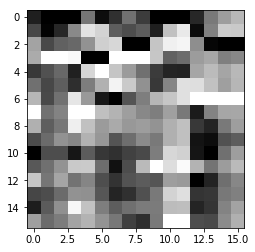

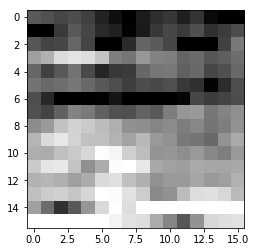

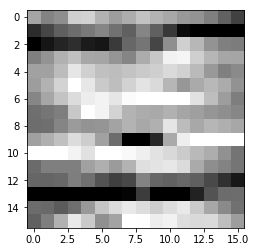

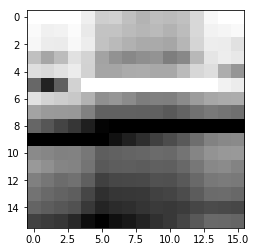

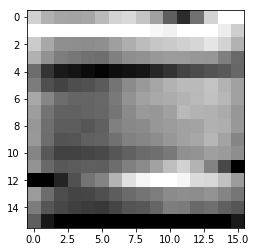

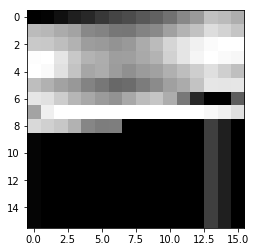

In [2]:
#  all imports
from termcolor import colored
from glob import glob
import os
import pprint
pp = pprint.PrettyPrinter(indent=4)
from pylab import *
from pandas import Series
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import scipy.io
from tqdm import tqdm_notebook as tqdm
from time import sleep
import warnings
warnings.filterwarnings('ignore')
# from Pbar import Pbar

#  import all data
# output_loc = r"Z:\User Data\Neha reddy\ECG\Prelim AIM\Results\Machine Learning\DataConvert\Noisy data images-W4s"
filepath = r"Z:\User Data\Neha reddy\ECG\Prelim AIM\Data\Machine Learning\DataConvert\Ind File test"
files = glob(filepath+'*/*.mat')

print(colored("len_of_files:",'red'), len(files))

# since 1s is equal to 256 samples here
time_series_window = 256
reshape_size = int(sqrt(time_series_window))
print(colored("reshape size",'red'), reshape_size)
scaler = MinMaxScaler(feature_range=(0, 255))

for file in files:
    filepath = '\\'.join(file.split('\\')[:])
    filename = '\\'.join(file.split('\\')[-1:])
    filename = '\\'.join(filename.split('.')[:-1])
    print(colored("file_proccesing:",'blue'), filename)

    mats = scipy.io.loadmat(filepath)
    data = mats['data'][0]

    noise_presence = data['noise_presence'][0][:]
    if noise_presence == "Noise_present":
        time_series = data['noisy_data'][0][0][1:5000] 
#         time_series = data['good_data'][0][0][1:5000] 
        for i in range(0,int(len(time_series)/time_series_window)+1):
            start11 = (i)*time_series_window
            end11 = (i+1)*time_series_window
            n = time_series_window - len(time_series[start11:end11])
            if n !=0:
                start1 = (i*time_series_window)
                end1 = (i+1)*time_series_window
                nn = time_series_window - len(time_series[start1:end1])
                time_series_seg = np.pad(time_series[start1:len(time_series)], (0, nn), 'constant')  
                time_series_seg_reshaped = time_series_seg.reshape(reshape_size,reshape_size)
            else:                
                start1 = (i)*time_series_window
                end1 = (i+1)*time_series_window
                time_series_seg = time_series[start1:end1]
                time_series_seg_reshaped = time_series_seg.reshape(reshape_size,reshape_size)
                
            scaler = scaler.fit(time_series_seg_reshaped)
            normalized = scaler.transform(time_series_seg_reshaped)
#             saving_to = output_loc + "\\" +str(filename) + str(i) + ".png"
#             scipy.misc.imsave(saving_to, normalized)
#             print("time_series_seg", time_series_seg)
#             print("time_series_seg_reshaped", time_series_seg_reshaped)
            plt.figure()
            plt.imshow(normalized, cmap='gray')

    else:
        print(colored("noise not present",'red'))

